In [27]:
#from IPython.core.interactiveshell import InteractiveShell  
#InteractiveShell.ast_node_interactivity = "all"

In [57]:
#To revert to the original setting :

#InteractiveShell.ast_node_interactivity = "last_expr"


# i will come back after less than ten days to complete this project and do some process like:
## 1- normlize 
## 2- solve overfiting 
## 3- do ensamble tec
## 4- try do nural newtork 
## 5- delete some feature that makes model hard to know the reationship between each feature 
## 6- solve the problem of target class
## 7- do feature selection 

# 1. Import libraries

In [14]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
import scipy.stats
#import dabl
#import pandas_profiling 
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier, plot_importance


# Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [15]:
#ec = dabl.SimpleClassifier(random_state=0).fit(data, target_col="Class") 

In [16]:
#data = pd.read_csv("xAPI-Edu-Data.csv")

In [17]:
#data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [18]:
#data.profile_report()

In [793]:
# profile = data.profile_report(title='Pandas Profiling Report')
# profile.to_file(output_file="student academic preformence data profiling.html")

Profiling is a process that helps us in understanding our data and PandasProfiling is python package which does exactly that. It is a simple and fast way to perform exploratory data analysis of a Pandas Dataframe. The pandasdf.describe()and df.info()functions are normally used as a first step in the EDA process. However, it only gives a very basic overview of the data and doesn’t help much in the case of large data sets. The Pandas Profiling function, on the other hand, extends the pandas DataFrame withdf.profile_report() for quick data analysis. It displays a lot of information with a single line of code and that too in an interactive HTML report.

# 2. read data


In [19]:
data = pd.read_csv("xAPI-Edu-Data.csv")

In [20]:
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


# 3. Exploratory Data Analysis (EDA)

In [21]:
#dabl.clean(data, verbose=1)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

### 3.1 Categorical Features

In [24]:
data.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

gender                       2
NationalITy                 14
PlaceofBirth                14
StageID                      3
GradeID                     10
SectionID                    3
Topic                       12
Semester                     2
Relation                     2
ParentAnsweringSurvey        2
ParentschoolSatisfaction     2
StudentAbsenceDays           2
Class                        3
dtype: int64

In [25]:
categorical_F = data.select_dtypes(object)

In [26]:
categorical_F.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey',
       'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class'],
      dtype='object')

In [27]:
categorical_F.describe()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
count,480,480,480,480,480,480,480,480,480,480,480,480,480
unique,2,14,14,3,10,3,12,2,2,2,2,2,3
top,M,KW,KuwaIT,MiddleSchool,G-02,A,IT,F,Father,Yes,Good,Under-7,M
freq,305,179,180,248,147,283,95,245,283,270,292,289,211


#### 3.1.1 gender Features

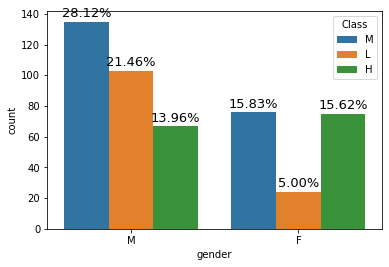

In [28]:
#plt.figure(figsize=(10,10))
s = sns.countplot(x=data["gender"], hue="Class", data=data)
sizes=[]
for p in s.patches:
    height = p.get_height()
    sizes.append(height)
    s.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(data)*100),
            ha="center", fontsize=13)

<AxesSubplot:xlabel='count', ylabel='gender'>

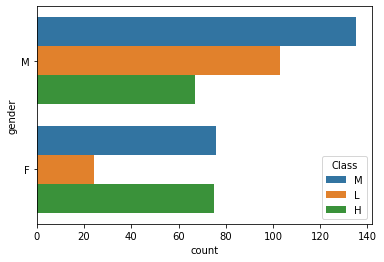

In [29]:
sns.countplot(y=categorical_F["gender"], hue="Class", data=data)

In [30]:
data.groupby(categorical_F["gender"])["Class"].value_counts()

gender  Class
F       M         76
        H         75
        L         24
M       M        135
        L        103
        H         67
Name: Class, dtype: int64

In [31]:
categorical_F["gender"].value_counts()

M    305
F    175
Name: gender, dtype: int64

#### 3.1.2 NationalITy Features

<AxesSubplot:xlabel='count', ylabel='NationalITy'>

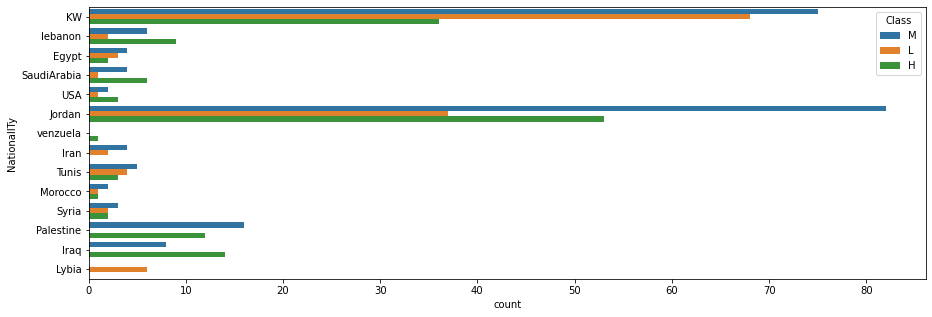

In [32]:
plt.figure(figsize=(15,5))
sns.countplot(y=categorical_F["NationalITy"], hue="Class", data=data)

In [33]:
data.groupby(categorical_F["NationalITy"])["Class"].value_counts()

NationalITy  Class
Egypt        M         4
             L         3
             H         2
Iran         M         4
             L         2
Iraq         H        14
             M         8
Jordan       M        82
             H        53
             L        37
KW           M        75
             L        68
             H        36
Lybia        L         6
Morocco      M         2
             H         1
             L         1
Palestine    M        16
             H        12
SaudiArabia  H         6
             M         4
             L         1
Syria        M         3
             H         2
             L         2
Tunis        M         5
             L         4
             H         3
USA          H         3
             M         2
             L         1
lebanon      H         9
             M         6
             L         2
venzuela     H         1
Name: Class, dtype: int64

In [34]:
categorical_F["NationalITy"].value_counts()

KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
USA              6
Iran             6
Lybia            6
Morocco          4
venzuela         1
Name: NationalITy, dtype: int64

#### 3.1.3 PlaceofBirth Features

<AxesSubplot:xlabel='count', ylabel='PlaceofBirth'>

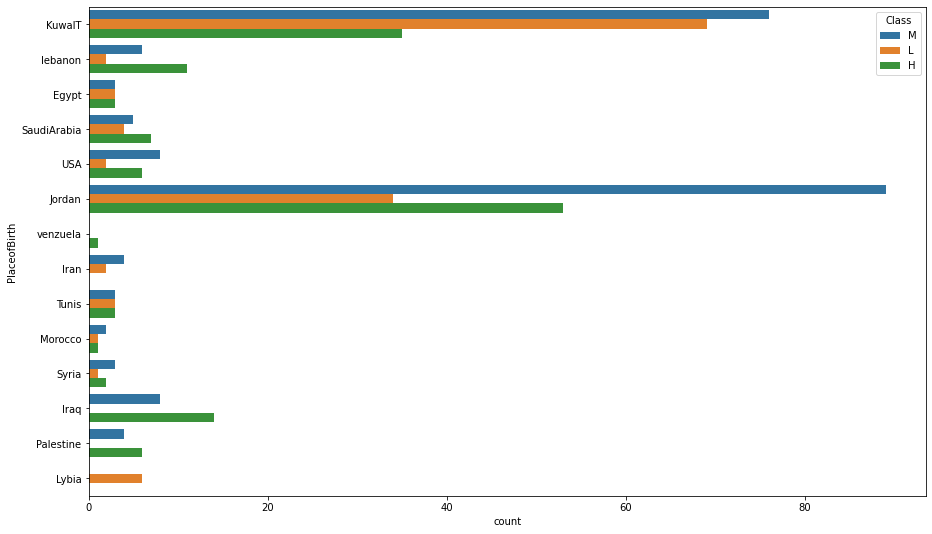

In [35]:
plt.figure(figsize=(15,9))
sns.countplot(y=categorical_F["PlaceofBirth"], hue="Class", data=data)

In [36]:
data.groupby(categorical_F["PlaceofBirth"])["Class"].value_counts()

PlaceofBirth  Class
Egypt         H         3
              L         3
              M         3
Iran          M         4
              L         2
Iraq          H        14
              M         8
Jordan        M        89
              H        53
              L        34
KuwaIT        M        76
              L        69
              H        35
Lybia         L         6
Morocco       M         2
              H         1
              L         1
Palestine     H         6
              M         4
SaudiArabia   H         7
              M         5
              L         4
Syria         M         3
              H         2
              L         1
Tunis         H         3
              L         3
              M         3
USA           M         8
              H         6
              L         2
lebanon       H        11
              M         6
              L         2
venzuela      H         1
Name: Class, dtype: int64

In [37]:
categorical_F["PlaceofBirth"].value_counts()

KuwaIT         180
Jordan         176
Iraq            22
lebanon         19
SaudiArabia     16
USA             16
Palestine       10
Egypt            9
Tunis            9
Iran             6
Syria            6
Lybia            6
Morocco          4
venzuela         1
Name: PlaceofBirth, dtype: int64

#### 3.1.4 StageID Features

<AxesSubplot:xlabel='count', ylabel='StageID'>

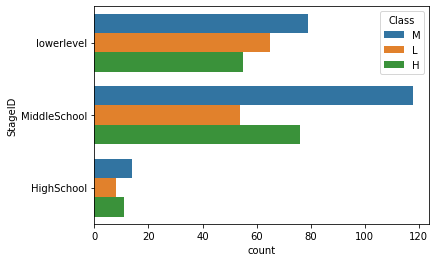

In [38]:
sns.countplot(y=categorical_F["StageID"], hue="Class", data=data)

In [39]:
data.groupby(categorical_F["StageID"])["Class"].value_counts()

StageID       Class
HighSchool    M         14
              H         11
              L          8
MiddleSchool  M        118
              H         76
              L         54
lowerlevel    M         79
              L         65
              H         55
Name: Class, dtype: int64

In [40]:
categorical_F["StageID"].value_counts()

MiddleSchool    248
lowerlevel      199
HighSchool       33
Name: StageID, dtype: int64

#### 3.1.5 GradeID Features

<AxesSubplot:xlabel='count', ylabel='GradeID'>

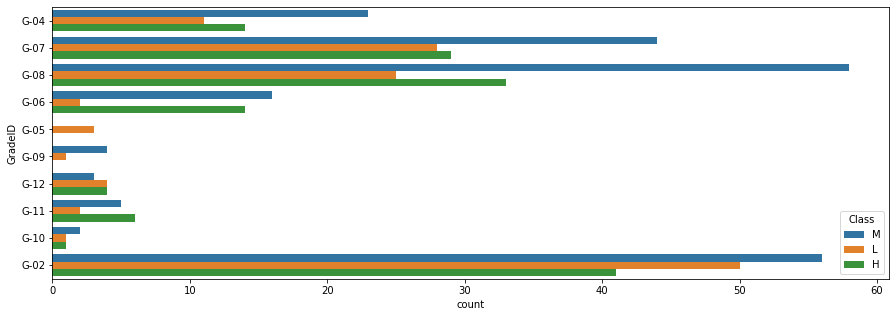

In [41]:
plt.figure(figsize=(15,5))
sns.countplot(y=categorical_F["GradeID"], hue="Class", data=data)

In [42]:
data.groupby(categorical_F["GradeID"])["Class"].value_counts()

GradeID  Class
G-02     M        56
         L        50
         H        41
G-04     M        23
         H        14
         L        11
G-05     L         3
G-06     M        16
         H        14
         L         2
G-07     M        44
         H        29
         L        28
G-08     M        58
         H        33
         L        25
G-09     M         4
         L         1
G-10     M         2
         H         1
         L         1
G-11     H         6
         M         5
         L         2
G-12     H         4
         L         4
         M         3
Name: Class, dtype: int64

In [43]:
categorical_F["GradeID"].value_counts()

G-02    147
G-08    116
G-07    101
G-04     48
G-06     32
G-11     13
G-12     11
G-09      5
G-10      4
G-05      3
Name: GradeID, dtype: int64

#### 3.1.6 SectionID Features

<AxesSubplot:xlabel='count', ylabel='SectionID'>

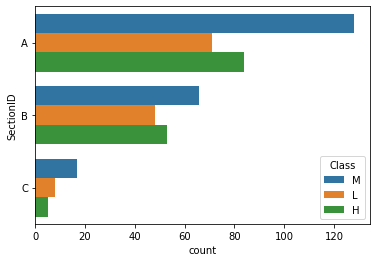

In [44]:
sns.countplot(y=categorical_F["SectionID"], hue="Class", data=data)

In [45]:
data.groupby(categorical_F["SectionID"])["Class"].value_counts()

SectionID  Class
A          M        128
           H         84
           L         71
B          M         66
           H         53
           L         48
C          M         17
           L          8
           H          5
Name: Class, dtype: int64

In [46]:
categorical_F["SectionID"].value_counts()

A    283
B    167
C     30
Name: SectionID, dtype: int64

#### 3.1.7 Topic Features

<AxesSubplot:xlabel='count', ylabel='Topic'>

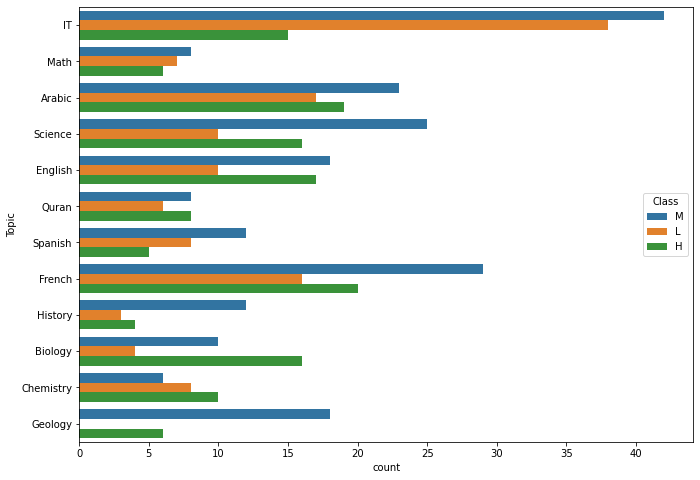

In [47]:
plt.figure(figsize=(11,8))
sns.countplot(y=categorical_F["Topic"], hue="Class", data=data)

In [48]:
data.groupby(categorical_F["Topic"])["Class"].value_counts()

Topic      Class
Arabic     M        23
           H        19
           L        17
Biology    H        16
           M        10
           L         4
Chemistry  H        10
           L         8
           M         6
English    M        18
           H        17
           L        10
French     M        29
           H        20
           L        16
Geology    M        18
           H         6
History    M        12
           H         4
           L         3
IT         M        42
           L        38
           H        15
Math       M         8
           L         7
           H         6
Quran      H         8
           M         8
           L         6
Science    M        25
           H        16
           L        10
Spanish    M        12
           L         8
           H         5
Name: Class, dtype: int64

In [49]:
categorical_F["Topic"].value_counts()

IT           95
French       65
Arabic       59
Science      51
English      45
Biology      30
Spanish      25
Chemistry    24
Geology      24
Quran        22
Math         21
History      19
Name: Topic, dtype: int64

#### 3.1.8 Semester Features

<AxesSubplot:xlabel='count', ylabel='Semester'>

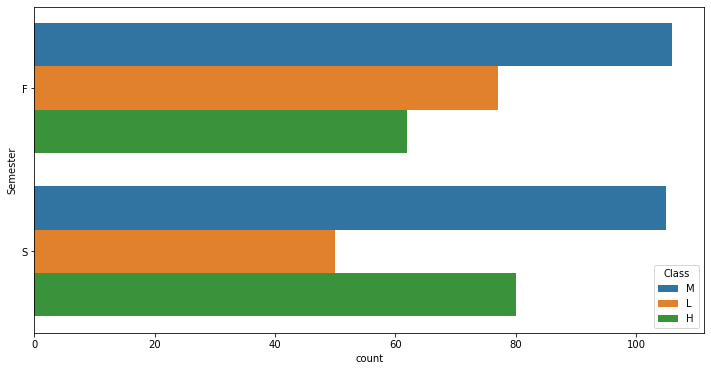

In [50]:
plt.figure(figsize=(12,6))
sns.countplot(y=categorical_F["Semester"], hue="Class", data=data)

In [51]:
data.groupby(categorical_F["Semester"])["Class"].value_counts()


Semester  Class
F         M        106
          L         77
          H         62
S         M        105
          H         80
          L         50
Name: Class, dtype: int64

In [52]:
categorical_F["Semester"].value_counts()

F    245
S    235
Name: Semester, dtype: int64

#### 3.1.9 Relation Features

<AxesSubplot:xlabel='count', ylabel='Relation'>

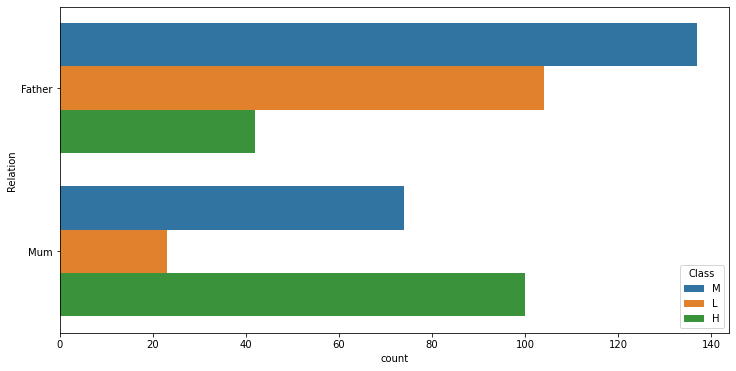

In [53]:
plt.figure(figsize=(12,6))
sns.countplot(y=categorical_F["Relation"], hue="Class", data=data)

In [54]:
data.groupby(categorical_F["Relation"])["Class"].value_counts()

Relation  Class
Father    M        137
          L        104
          H         42
Mum       H        100
          M         74
          L         23
Name: Class, dtype: int64

In [55]:
categorical_F["Relation"].value_counts()

Father    283
Mum       197
Name: Relation, dtype: int64

#### 3.1.10 ParentAnsweringSurvey Features

<AxesSubplot:xlabel='count', ylabel='ParentAnsweringSurvey'>

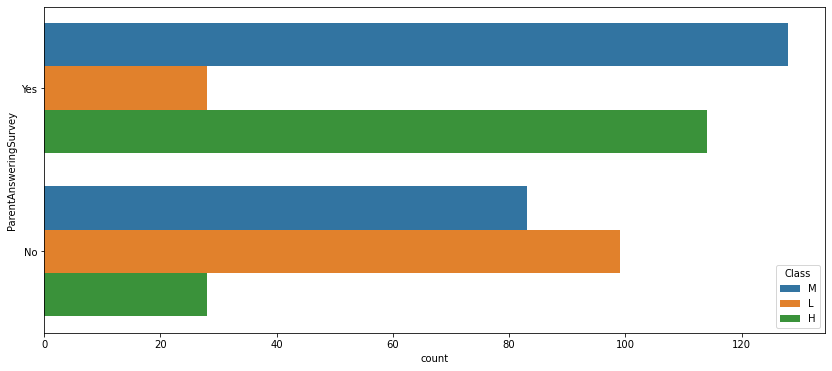

In [56]:
plt.figure(figsize=(14,6))
sns.countplot(y=categorical_F["ParentAnsweringSurvey"], hue="Class", data=data)

In [57]:
data.groupby(categorical_F["ParentAnsweringSurvey"])["Class"].value_counts()


ParentAnsweringSurvey  Class
No                     L         99
                       M         83
                       H         28
Yes                    M        128
                       H        114
                       L         28
Name: Class, dtype: int64

In [58]:
categorical_F["ParentAnsweringSurvey"].value_counts()

Yes    270
No     210
Name: ParentAnsweringSurvey, dtype: int64

#### 3.1.11 ParentschoolSatisfaction Features

<AxesSubplot:xlabel='count', ylabel='ParentschoolSatisfaction'>

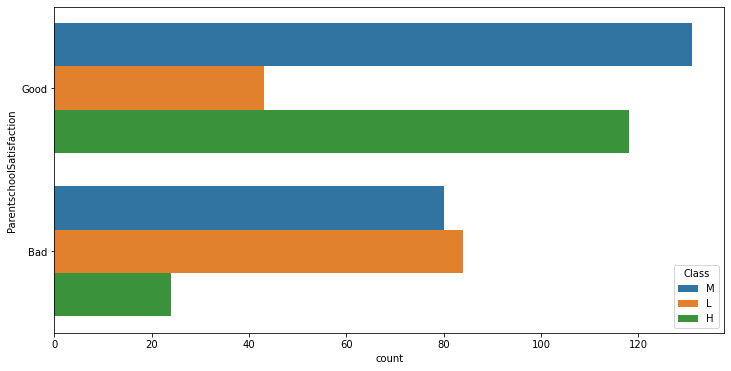

In [59]:
plt.figure(figsize=(12,6))
sns.countplot(y=categorical_F["ParentschoolSatisfaction"], hue="Class", data=data)

In [60]:
data.groupby(categorical_F["ParentschoolSatisfaction"])["Class"].value_counts()

ParentschoolSatisfaction  Class
Bad                       L         84
                          M         80
                          H         24
Good                      M        131
                          H        118
                          L         43
Name: Class, dtype: int64

In [61]:
categorical_F["ParentschoolSatisfaction"].value_counts()

Good    292
Bad     188
Name: ParentschoolSatisfaction, dtype: int64

#### 3.1.12 StudentAbsenceDays Features

<AxesSubplot:xlabel='count', ylabel='StudentAbsenceDays'>

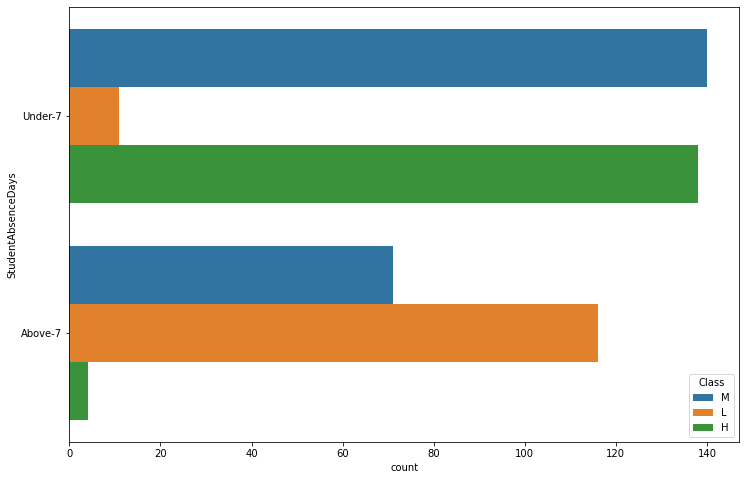

In [62]:
plt.figure(figsize=(12,8))
sns.countplot(y=categorical_F["StudentAbsenceDays"], hue="Class", data=data)

In [63]:
data.groupby(categorical_F["StudentAbsenceDays"])["Class"].value_counts()

StudentAbsenceDays  Class
Above-7             L        116
                    M         71
                    H          4
Under-7             M        140
                    H        138
                    L         11
Name: Class, dtype: int64

In [64]:
categorical_F["StudentAbsenceDays"].value_counts()

Under-7    289
Above-7    191
Name: StudentAbsenceDays, dtype: int64

### 3.2 Numeric Features

In [65]:
#not good to know the number of unique value in numeric column
data.select_dtypes(np.number).apply(pd.Series.nunique, axis = 0)

raisedhands          82
VisITedResources     89
AnnouncementsView    88
Discussion           90
dtype: int64

In [66]:
Numeric_F = data.select_dtypes(np.number)

In [67]:
Numeric_F.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [68]:
Numeric_F.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,15,16,2,20
1,20,20,3,25
2,10,7,0,30
3,30,25,5,35
4,40,50,12,50


#### 3.2.1 raisedhands Features

<AxesSubplot:xlabel='raisedhands'>

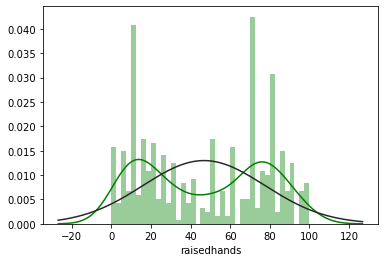

In [69]:
sns.distplot(data["raisedhands"],color="g",bins=40,fit=scipy.stats.norm)

#### 3.2.2 VisITedResources Features

<AxesSubplot:xlabel='VisITedResources'>

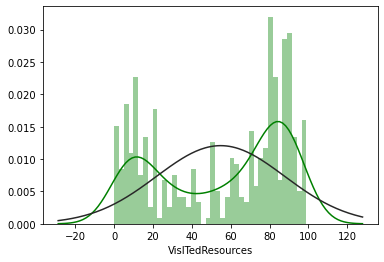

In [70]:
sns.distplot(data["VisITedResources"],color="g",bins=40,fit=scipy.stats.norm)

#### 3.2.3 AnnouncementsView Features

<AxesSubplot:xlabel='AnnouncementsView'>

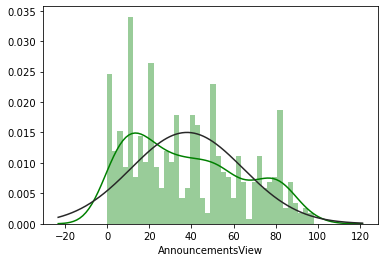

In [71]:
sns.distplot(data["AnnouncementsView"],color="g",bins=40,fit=scipy.stats.norm)

#### 3.2.3 Discussion Features

In [72]:
data["Discussion"].describe()

count    480.000000
mean      43.283333
std       27.637735
min        1.000000
25%       20.000000
50%       39.000000
75%       70.000000
max       99.000000
Name: Discussion, dtype: float64

<AxesSubplot:xlabel='Discussion'>

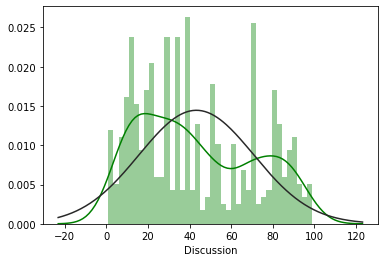

In [73]:
sns.distplot(data["Discussion"],color="g",bins=40,fit=scipy.stats.norm)

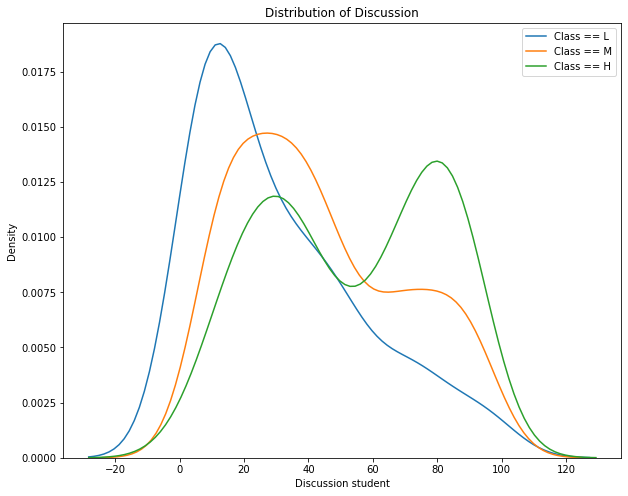

In [74]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(data.loc[data['Class'] == "L", 'Discussion'] ,label = 'Class == L')
sns.kdeplot(data.loc[data['Class'] == "M", 'Discussion'],label = 'Class == M')
sns.kdeplot(data.loc[data['Class'] == "H", 'Discussion'],label = 'Class == H')




# Labeling of plot
plt.xlabel('Discussion student'); plt.ylabel('Density'); plt.title('Distribution of Discussion');

## 4. Creation Feature 

In [75]:
categorical_F["Topic"].value_counts()

IT           95
French       65
Arabic       59
Science      51
English      45
Biology      30
Spanish      25
Chemistry    24
Geology      24
Quran        22
Math         21
History      19
Name: Topic, dtype: int64

 we can create new feature here called Tracks 

In [76]:
# def paths(cols):
#     Topics=cols[0]
    
    
#     if Topics == "IT" :
#             return "information technology"
#     elif (Topics == "French") or (Topics == "Arabic") or (Topics == "English") or (Topics == "Spanish") :
#             return "languages"
#     elif (Topics == "Science") or (Topics == "Biology") or (Topics == "Chemistry") or (Topics == "Geology") or  (Topics == "Math"):
#         return "Sciences"
#     elif Topics == "Quran" :
#         return "religion"   
#     else:
#         return "History"

In [77]:
# create a list of our conditions
conditions = [
    (data["Topic"] == "IT"),
    ((data["Topic"] == "French") | (data["Topic"] == "Arabic") | (data["Topic"] == "English") | (data["Topic"] == "Spanish")),
    ((data["Topic"] == "Science") | (data["Topic"] == "Biology") | (data["Topic"] == "Chemistry") | (data["Topic"] == "Geology") |  (data["Topic"] == "Math")),
    (data["Topic"] == "Quran"),
    (data["Topic"] == "History")
    ]

# create a list of the values we want to assign for each condition
values = ["information technology", "languages", "Sciences", "religion" , "History"]

# create a new column and use np.select to assign values to it using our lists as arguments
data['Tracks'] = np.select(conditions, values)

# display updated DataFrame
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Tracks
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,information technology
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,information technology
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L,information technology
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L,information technology
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M,information technology


In [78]:
data["Tracks"].value_counts()

languages                 194
Sciences                  150
information technology     95
religion                   22
History                    19
Name: Tracks, dtype: int64

In [79]:
categorical_F["Topic"].value_counts()

IT           95
French       65
Arabic       59
Science      51
English      45
Biology      30
Spanish      25
Chemistry    24
Geology      24
Quran        22
Math         21
History      19
Name: Topic, dtype: int64

In [80]:
data.head(20)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Tracks
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,information technology
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,information technology
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L,information technology
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L,information technology
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M,information technology
5,F,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,42,30,13,70,Yes,Bad,Above-7,M,information technology
6,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,35,12,0,17,No,Bad,Above-7,L,Sciences
7,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,50,10,15,22,Yes,Good,Under-7,M,Sciences
8,F,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,12,21,16,50,Yes,Good,Under-7,M,Sciences
9,F,KW,KuwaIT,MiddleSchool,G-07,B,IT,F,Father,70,80,25,70,Yes,Good,Under-7,M,information technology


In [81]:
data["GradeID"].value_counts()

G-02    147
G-08    116
G-07    101
G-04     48
G-06     32
G-11     13
G-12     11
G-09      5
G-10      4
G-05      3
Name: GradeID, dtype: int64

<AxesSubplot:xlabel='GradeID', ylabel='count'>

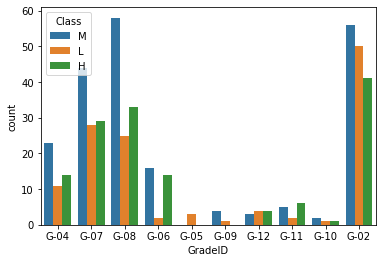

In [82]:
sns.countplot(x="GradeID",data=data,hue="Class")

In [83]:
data["StageID"].value_counts()

MiddleSchool    248
lowerlevel      199
HighSchool       33
Name: StageID, dtype: int64

In [84]:
data.groupby(data["StageID"])["GradeID"].value_counts()

StageID       GradeID
HighSchool    G-11        13
              G-12        11
              G-09         5
              G-10         4
MiddleSchool  G-08       116
              G-07       100
              G-06        32
lowerlevel    G-02       147
              G-04        48
              G-05         3
              G-07         1
Name: GradeID, dtype: int64

In [85]:
data.groupby(data["NationalITy"])["PlaceofBirth"].value_counts()

NationalITy  PlaceofBirth
Egypt        Egypt             8
             KuwaIT            1
Iran         Iran              6
Iraq         Iraq             22
Jordan       Jordan          152
             SaudiArabia       9
             Palestine         4
             lebanon           3
             USA               2
             Egypt             1
             KuwaIT            1
KW           KuwaIT          177
             USA               2
Lybia        Lybia             6
Morocco      Morocco           4
Palestine    Jordan           22
             Palestine         6
SaudiArabia  SaudiArabia       6
             USA               5
Syria        Syria             6
             Jordan            1
Tunis        Tunis             9
             KuwaIT            1
             SaudiArabia       1
             USA               1
USA          USA               6
lebanon      lebanon          16
             Jordan            1
venzuela     venzuela          1
Name: PlaceofBirt

In [86]:
def PlaceofBirth(row):
    
    
    
    if ((row["NationalITy"] == "Egypt")  & (row["PlaceofBirth"] == "Egypt")) | ((row["NationalITy"] == "venzuela") & (row["PlaceofBirth"] == "venzuela")) |((row["NationalITy"] == "lebanon" )& (row["PlaceofBirth"] == "lebanon")) |((row["NationalITy"] == "USA") & (row["PlaceofBirth"] == "USA"))|((row["NationalITy"] == "Tunis")  & (row["PlaceofBirth"] == "Tunis"))|((row["NationalITy"] == "Syria") & (row["PlaceofBirth"] == "Syria"))|((row["NationalITy"]== "SaudiArabia")  & (row["PlaceofBirth"] == "SaudiArabia"))|((row["NationalITy"]== "Palestine")  & (row["PlaceofBirth"] == "Palestine"))|((row["NationalITy"] == "Morocco") & (row["PlaceofBirth"] == "Morocco"))|((row["NationalITy"] == "Lybia") & (row["PlaceofBirth"] == "Lybia"))|((row["NationalITy"] == "Jordan") & (row["PlaceofBirth"] == "Jordan"))|((row["NationalITy"]== "Iraq") & (row["PlaceofBirth"] == "Iraq"))|((row["NationalITy"] == "KW") & (row["PlaceofBirth"] =="KuwaIT"))|((row["NationalITy"]== "Iran") & (row["PlaceofBirth"] == "Iran")):
            return 1
    else:
        return 0 
    

In [87]:
data["BrithInHisCountery"] = data.apply(PlaceofBirth, axis=1)

In [88]:
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Tracks,BrithInHisCountery
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,information technology,1
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,information technology,1
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L,information technology,1
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L,information technology,1
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M,information technology,1


In [89]:
data.groupby(data["PlaceofBirth"])["NationalITy"].value_counts()

PlaceofBirth  NationalITy
Egypt         Egypt            8
              Jordan           1
Iran          Iran             6
Iraq          Iraq            22
Jordan        Jordan         152
              Palestine       22
              Syria            1
              lebanon          1
KuwaIT        KW             177
              Egypt            1
              Jordan           1
              Tunis            1
Lybia         Lybia            6
Morocco       Morocco          4
Palestine     Palestine        6
              Jordan           4
SaudiArabia   Jordan           9
              SaudiArabia      6
              Tunis            1
Syria         Syria            6
Tunis         Tunis            9
USA           USA              6
              SaudiArabia      5
              Jordan           2
              KW               2
              Tunis            1
lebanon       lebanon         16
              Jordan           3
venzuela      venzuela         1
Name: NationalITy

In [90]:
## we will create new feature called BirthInHisCountery if the student porn in his countery or not (0,1)

In [91]:
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Tracks,BrithInHisCountery
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,information technology,1
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,information technology,1
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L,information technology,1
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L,information technology,1
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M,information technology,1


In [92]:
# <!-- we will make new column called confeneitInScoohle (مرتاح في المدرسة ) if the VisITedResources and Discussion and ParentschoolSatisfaction and StudentAbsenceDays under-7    -->

In [93]:
# new column called (تفاعل المسؤل مع المدرسة ) father-yes , father-no , mum-yes mum-no ,, 
# Relation + ParentschoolSatisfaction 

In [94]:
data["ParentInteractionWithSchool"] = data["Relation"] +"-"+ data["ParentschoolSatisfaction"]

In [95]:
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Tracks,BrithInHisCountery,ParentInteractionWithSchool
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,information technology,1,Father-Good
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,information technology,1,Father-Good
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L,information technology,1,Father-Bad
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L,information technology,1,Father-Bad
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M,information technology,1,Father-Bad


In [96]:
data["StageID"].value_counts()

MiddleSchool    248
lowerlevel      199
HighSchool       33
Name: StageID, dtype: int64

we make new column called (loveTopic) if the student love the topic he will do good in it ----->
raisedhands + VisITedResources + AnnouncementsView + Discussion  more than mean of (raisedhands + VisITedResources + AnnouncementsView + Discussion) and StudentAbsenceDays under-7 then we put 1 ,,, otherwise 0 

In [97]:
data[data["StageID"] == "lowerlevel"].mean()

raisedhands           38.447236
VisITedResources      50.798995
AnnouncementsView     31.417085
Discussion            38.427136
BrithInHisCountery     0.914573
dtype: float64

In [98]:
meanOfLower = 38.447236 + 50.798995 + 31.417085 + 38.427136

In [99]:
meanOfLower

159.090452

In [100]:
data[data["StageID"] == "MiddleSchool"].mean()

raisedhands           53.939516
VisITedResources      58.568548
AnnouncementsView     43.274194
Discussion            45.875000
BrithInHisCountery     0.879032
dtype: float64

In [101]:
meanOfMiddle = 53.939516 + 58.568548 + 43.274194 + 45.875000

In [102]:
meanOfMiddle

201.65725799999998

In [103]:
data[data["StageID"] == "HighSchool"].mean()

raisedhands           43.151515
VisITedResources      50.575758
AnnouncementsView     36.878788
Discussion            53.090909
BrithInHisCountery     0.757576
dtype: float64

In [104]:
meanOfHigh = 43.151515 + 50.575758 + 36.878788 + 53.090909

In [105]:
meanOfHigh

183.69697000000002

In [106]:
def loveTopic(row):
    if row["StageID"] == "lowerlevel":
        if (row["raisedhands"] + row["VisITedResources"] + row["AnnouncementsView"] + row["Discussion"]) > 159.090452 :
            return 1
        else:
            return 0
    if row["StageID"] == "MiddleSchool":
        if (row["raisedhands"] + row["VisITedResources"] + row["AnnouncementsView"] + row["Discussion"]) > 201.65725799999998 :
            return 1
        else:
            return 0
    if row["StageID"] == "HighSchool":
        if (row["raisedhands"] + row["VisITedResources"] + row["AnnouncementsView"] + row["Discussion"]) > 183.69697000000002 :
            return 1
        else:
            return 0
    


In [107]:
data["loveTopic"] = data.apply(loveTopic,axis=1)

In [108]:
data["loveTopic"].value_counts()

1    250
0    230
Name: loveTopic, dtype: int64

In [109]:
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,...,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Tracks,BrithInHisCountery,ParentInteractionWithSchool,loveTopic
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,...,2,20,Yes,Good,Under-7,M,information technology,1,Father-Good,0
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,...,3,25,Yes,Good,Under-7,M,information technology,1,Father-Good,0
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,...,0,30,No,Bad,Above-7,L,information technology,1,Father-Bad,0
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,...,5,35,No,Bad,Above-7,L,information technology,1,Father-Bad,0
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,...,12,50,No,Bad,Above-7,M,information technology,1,Father-Bad,0


In [110]:
# from atom import ATOMClassifier
# atom = ATOMClassifier(data.drop("Class"), y=data["Class"], test_size=0.3, verbose=2)

In [882]:
# if the rasehand of student more than avrage of student in it and if the VisITedResources of student more than avrage of student in it

# then he will intarct in the class

In [111]:
data.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,BrithInHisCountery,loveTopic
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333,0.885417,0.520833
std,30.779223,33.080007,26.611244,27.637735,0.318851,0.500087
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,15.750000,20.000000,14.000000,20.000000,1.000000,0.000000
50%,50.000000,65.000000,33.000000,39.000000,1.000000,1.000000
75%,75.000000,84.000000,58.000000,70.000000,1.000000,1.000000
max,100.000000,99.000000,98.000000,99.000000,1.000000,1.000000


In [112]:
bin_raisedhands = pd.cut(data["raisedhands"],bins=[-1,16,51,100],labels=["LowRaishand","middileRaishand", "HighRaishand"])
data["raisedhands_bins"] = bin_raisedhands
data["raisedhands_bins"] = data["raisedhands_bins"].astype(str)

bin_VisITedResources = pd.cut(data["VisITedResources"],bins=[-1,20,65,100],labels=["LowVisITedResources","middileVisITedResources", "HighVisITedResources"])
data["VisITedResources_bins"] = bin_VisITedResources
data["VisITedResources_bins"] = data["VisITedResources_bins"].astype(str)

bin_AnnouncementsView = pd.cut(data["AnnouncementsView"],bins=[-1,14,33,99],labels=["LowAnnouncementsView","middileAnnouncementsView", "HighAnnouncementsView"])
data["AnnouncementsView_bins"] = bin_AnnouncementsView
data["AnnouncementsView_bins"] = data["AnnouncementsView_bins"].astype(str)

bin_Discussion = pd.cut(data["Discussion"],bins=[0,20,39,100],labels=["LowDiscussion","middileDiscussion", "HighDiscussion"])
data["Discussion_bins"] = bin_Discussion
data["Discussion_bins"] = data["Discussion_bins"].astype(str)


In [113]:
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,...,StudentAbsenceDays,Class,Tracks,BrithInHisCountery,ParentInteractionWithSchool,loveTopic,raisedhands_bins,VisITedResources_bins,AnnouncementsView_bins,Discussion_bins
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,...,Under-7,M,information technology,1,Father-Good,0,LowRaishand,LowVisITedResources,LowAnnouncementsView,LowDiscussion
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,...,Under-7,M,information technology,1,Father-Good,0,middileRaishand,LowVisITedResources,LowAnnouncementsView,middileDiscussion
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,...,Above-7,L,information technology,1,Father-Bad,0,LowRaishand,LowVisITedResources,LowAnnouncementsView,middileDiscussion
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,...,Above-7,L,information technology,1,Father-Bad,0,middileRaishand,middileVisITedResources,LowAnnouncementsView,middileDiscussion
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,...,Above-7,M,information technology,1,Father-Bad,0,middileRaishand,middileVisITedResources,LowAnnouncementsView,HighDiscussion


In [114]:
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,...,StudentAbsenceDays,Class,Tracks,BrithInHisCountery,ParentInteractionWithSchool,loveTopic,raisedhands_bins,VisITedResources_bins,AnnouncementsView_bins,Discussion_bins
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,...,Under-7,M,information technology,1,Father-Good,0,LowRaishand,LowVisITedResources,LowAnnouncementsView,LowDiscussion
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,...,Under-7,M,information technology,1,Father-Good,0,middileRaishand,LowVisITedResources,LowAnnouncementsView,middileDiscussion
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,...,Above-7,L,information technology,1,Father-Bad,0,LowRaishand,LowVisITedResources,LowAnnouncementsView,middileDiscussion
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,...,Above-7,L,information technology,1,Father-Bad,0,middileRaishand,middileVisITedResources,LowAnnouncementsView,middileDiscussion
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,...,Above-7,M,information technology,1,Father-Bad,0,middileRaishand,middileVisITedResources,LowAnnouncementsView,HighDiscussion


In [115]:
data.isnull().sum()

gender                         0
NationalITy                    0
PlaceofBirth                   0
StageID                        0
GradeID                        0
SectionID                      0
Topic                          0
Semester                       0
Relation                       0
raisedhands                    0
VisITedResources               0
AnnouncementsView              0
Discussion                     0
ParentAnsweringSurvey          0
ParentschoolSatisfaction       0
StudentAbsenceDays             0
Class                          0
Tracks                         0
BrithInHisCountery             0
ParentInteractionWithSchool    0
loveTopic                      0
raisedhands_bins               0
VisITedResources_bins          0
AnnouncementsView_bins         0
Discussion_bins                0
dtype: int64

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       480 non-null    object
 1   NationalITy                  480 non-null    object
 2   PlaceofBirth                 480 non-null    object
 3   StageID                      480 non-null    object
 4   GradeID                      480 non-null    object
 5   SectionID                    480 non-null    object
 6   Topic                        480 non-null    object
 7   Semester                     480 non-null    object
 8   Relation                     480 non-null    object
 9   raisedhands                  480 non-null    int64 
 10  VisITedResources             480 non-null    int64 
 11  AnnouncementsView            480 non-null    int64 
 12  Discussion                   480 non-null    int64 
 13  ParentAnsweringSurvey        480 no

In [117]:
#data.profile_report()

In [118]:
#ec = dabl.SimpleClassifier(random_state=0).fit(data, target_col="Class") 

## 5. Feature Encoding

we will use Label Encoding for any categorical variables with only 2 categories and One-Hot Encoding for any categorical variables with more than 2 categories


In [891]:
#data["Class"] = data["Class"].astype('category')
#data["Class"] = data["Class"].cat.codes

In [119]:
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,...,StudentAbsenceDays,Class,Tracks,BrithInHisCountery,ParentInteractionWithSchool,loveTopic,raisedhands_bins,VisITedResources_bins,AnnouncementsView_bins,Discussion_bins
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,...,Under-7,M,information technology,1,Father-Good,0,LowRaishand,LowVisITedResources,LowAnnouncementsView,LowDiscussion
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,...,Under-7,M,information technology,1,Father-Good,0,middileRaishand,LowVisITedResources,LowAnnouncementsView,middileDiscussion
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,...,Above-7,L,information technology,1,Father-Bad,0,LowRaishand,LowVisITedResources,LowAnnouncementsView,middileDiscussion
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,...,Above-7,L,information technology,1,Father-Bad,0,middileRaishand,middileVisITedResources,LowAnnouncementsView,middileDiscussion
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,...,Above-7,M,information technology,1,Father-Bad,0,middileRaishand,middileVisITedResources,LowAnnouncementsView,HighDiscussion


### 5.1 Lable Encoding 

In [120]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in data:
    if data[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(data[col].unique())) <= 2:
            # Train on the training data
            le.fit(data[col])
            # Transform both training and testing data
            data[col] = le.transform(data[col])
            
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)


6 columns were label encoded.


In [121]:
data["Class"]

0      M
1      M
2      L
3      L
4      M
      ..
475    L
476    M
477    M
478    L
479    L
Name: Class, Length: 480, dtype: object

### 5.2 One-Hot Encoding

In [122]:
Y = data["Class"]

In [123]:
# one-hot encoding of categorical variables
data = pd.get_dummies(data,drop_first=True)
print('Training Features shape: ', data.shape)


Training Features shape:  (480, 79)


In [124]:
data.head()

,gender,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,...,ParentInteractionWithSchool_Mum-Bad,ParentInteractionWithSchool_Mum-Good,raisedhands_bins_LowRaishand,raisedhands_bins_middileRaishand,VisITedResources_bins_LowVisITedResources,VisITedResources_bins_middileVisITedResources,AnnouncementsView_bins_LowAnnouncementsView,AnnouncementsView_bins_middileAnnouncementsView,Discussion_bins_LowDiscussion,Discussion_bins_middileDiscussion
0,1,0,0,15,16,2,20,1,1,1,...,0,0,1,0,1,0,1,0,1,0
1,1,0,0,20,20,3,25,1,1,1,...,0,0,0,1,1,0,1,0,0,1
2,1,0,0,10,7,0,30,0,0,0,...,0,0,1,0,1,0,1,0,0,1
3,1,0,0,30,25,5,35,0,0,0,...,0,0,0,1,0,1,1,0,0,1
4,1,0,0,40,50,12,50,0,0,0,...,0,0,0,1,0,1,1,0,0,0


In [125]:
data.describe()

,gender,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,...,ParentInteractionWithSchool_Mum-Bad,ParentInteractionWithSchool_Mum-Good,raisedhands_bins_LowRaishand,raisedhands_bins_middileRaishand,VisITedResources_bins_LowVisITedResources,VisITedResources_bins_middileVisITedResources,AnnouncementsView_bins_LowAnnouncementsView,AnnouncementsView_bins_middileAnnouncementsView,Discussion_bins_LowDiscussion,Discussion_bins_middileDiscussion
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,...,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.635417,0.489583,0.410417,46.775000,54.797917,37.918750,43.283333,0.562500,0.608333,0.602083,...,0.091667,0.318750,0.254167,0.281250,0.266667,0.237500,0.252083,0.256250,0.268750,0.233333
std,0.481815,0.500413,0.492423,30.779223,33.080007,26.611244,27.637735,0.496596,0.488632,0.489979,...,0.288856,0.466478,0.435846,0.450078,0.442678,0.425995,0.434662,0.437017,0.443772,0.423394
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,15.750000,20.000000,14.000000,20.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,50.000000,65.000000,33.000000,39.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,75.000000,84.000000,58.000000,70.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,100.000000,99.000000,98.000000,99.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [127]:
# from sklearn import preprocessing

# data_raisedhands = np.array(data["raisedhands"])
# data["raisedhands"] = preprocessing.normalize(data_raisedhands)


# data_VisITedResources = np.array(data["VisITedResources"])
# data["VisITedResources"] = preprocessing.normalize(data_VisITedResources)

# data_AnnouncementsView = np.array(data["AnnouncementsView"])
# data["AnnouncementsView"] = preprocessing.normalize(data_AnnouncementsView)

# data_Discussion = np.array(data["Discussion"])
# data["Discussion"] = preprocessing.normalize(data_Discussion)

In [128]:
Y

0      M
1      M
2      L
3      L
4      M
      ..
475    L
476    M
477    M
478    L
479    L
Name: Class, Length: 480, dtype: object

In [129]:
data.columns

Index(['gender', 'Semester', 'Relation', 'raisedhands', 'VisITedResources',
       'AnnouncementsView', 'Discussion', 'ParentAnsweringSurvey',
       'ParentschoolSatisfaction', 'StudentAbsenceDays', 'BrithInHisCountery',
       'loveTopic', 'NationalITy_Iran', 'NationalITy_Iraq',
       'NationalITy_Jordan', 'NationalITy_KW', 'NationalITy_Lybia',
       'NationalITy_Morocco', 'NationalITy_Palestine',
       'NationalITy_SaudiArabia', 'NationalITy_Syria', 'NationalITy_Tunis',
       'NationalITy_USA', 'NationalITy_lebanon', 'NationalITy_venzuela',
       'PlaceofBirth_Iran', 'PlaceofBirth_Iraq', 'PlaceofBirth_Jordan',
       'PlaceofBirth_KuwaIT', 'PlaceofBirth_Lybia', 'PlaceofBirth_Morocco',
       'PlaceofBirth_Palestine', 'PlaceofBirth_SaudiArabia',
       'PlaceofBirth_Syria', 'PlaceofBirth_Tunis', 'PlaceofBirth_USA',
       'PlaceofBirth_lebanon', 'PlaceofBirth_venzuela', 'StageID_MiddleSchool',
       'StageID_lowerlevel', 'GradeID_G-04', 'GradeID_G-05', 'GradeID_G-06',
       'G

In [130]:
#set x and y for start trining 
#y=data["Class"]
x= data.drop(["Class_L","Class_M"],axis=1).values


In [132]:
#x.columns

## 6. split the data

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,Y,test_size=0.20,random_state=42)

## 7. Model Selection and predict score 

In [137]:
# Machine learning models
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier, GradientBoostingClassifier , ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score







In [138]:
from sklearn.tree import DecisionTreeClassifier

DecTreCla = DecisionTreeClassifier()
DecTreCla.fit(X_train,y_train)
Y_pred = DecTreCla.predict(X_test)
acc_DecTreCla = round(DecTreCla.score(X_test,Y_pred)*100,2)#80.28
acc_DecTreCla 

100.0

In [139]:
print(classification_report(y_test,Y_pred))
print(f1_score(y_test,Y_pred,average="weighted"))

              precision    recall  f1-score   support

           H       0.73      0.86      0.79        22
           L       0.79      1.00      0.88        26
           M       0.92      0.71      0.80        48

    accuracy                           0.82        96
   macro avg       0.81      0.86      0.82        96
weighted avg       0.84      0.82      0.82        96

0.8201241760828625


In [140]:
from sklearn.tree import ExtraTreeClassifier
ExTrCl = ExtraTreeClassifier()
ExTrCl.fit(X_train,y_train)
Y_pred = ExTrCl.predict(X_test)
acc_ExTrCl = round(ExTrCl.score(X_test,Y_pred)*100,2)#80.28
acc_ExTrCl 

100.0

In [142]:
from sklearn.ensemble import ExtraTreesClassifier
ExTrClEn = ExtraTreeClassifier()
ExTrClEn.fit(X_train,y_train)
Y_pred = ExTrClEn.predict(X_test)
acc_ExTrClEn = round(ExTrClEn.score(X_test,Y_pred)*100,2)#80.28
acc_ExTrClEn

100.0

In [143]:
print(classification_report(y_test,Y_pred))
print(f1_score(y_test,Y_pred,average="weighted"))

              precision    recall  f1-score   support

           H       0.67      0.73      0.70        22
           L       0.84      0.81      0.82        26
           M       0.79      0.77      0.78        48

    accuracy                           0.77        96
   macro avg       0.76      0.77      0.77        96
weighted avg       0.77      0.77      0.77        96

0.7719331897518732


In [146]:
from sklearn.neural_network import MLPClassifier
MLPC = MLPClassifier()
MLPC.fit(X_train,y_train)
Y_pred = MLPC.predict(X_test)
acc_MLPC = round(MLPC.score(X_test,Y_pred)*100,2)#80.28
acc_MLPC

100.0

In [148]:
xgb = XGBClassifier(max_depth=10, learning_rate=0.1, n_estimators=100,seed=10)
xgb_pred = xgb.fit(X_train, y_train).predict(X_test)


[21:01:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [149]:
print (classification_report(y_test,xgb_pred))
print(f1_score(y_test,xgb_pred,average="weighted"))

              precision    recall  f1-score   support

           H       0.79      0.68      0.73        22
           L       0.83      0.96      0.89        26
           M       0.83      0.81      0.82        48

    accuracy                           0.82        96
   macro avg       0.82      0.82      0.82        96
weighted avg       0.82      0.82      0.82        96

0.8200247188092181


In [152]:
from sklearn.ensemble import RandomForestClassifier
RaFoCl = RandomForestClassifier()
RaFoCl.fit(X_train,y_train)
Y_pred = RaFoCl.predict(X_test)
acc_RaFoCl = round(RaFoCl.score(X_test,Y_pred)*100,2)#80.28
acc_RaFoCl

100.0

In [153]:
print(classification_report(y_test,Y_pred))
f1_score(y_test,Y_pred,average="weighted")

              precision    recall  f1-score   support

           H       0.82      0.82      0.82        22
           L       0.88      0.88      0.88        26
           M       0.85      0.85      0.85        48

    accuracy                           0.85        96
   macro avg       0.85      0.85      0.85        96
weighted avg       0.85      0.85      0.85        96



0.8541666666666666

In [158]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train,y_train)
Y_pred = LogReg.predict(X_test)
acc_LogReg = round(LogReg.score(X_train,y_train)*100,2)#80.28
acc_LogReg 

80.21

In [159]:
coeff_df = pd.DataFrame(data.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(LogReg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
9,BrithInHisCountery,1.714032
7,ParentschoolSatisfaction,0.871755
2,raisedhands,0.439775
8,StudentAbsenceDays,0.416601
51,Topic_Chemistry,0.401378
...,...,...
27,PlaceofBirth_KuwaIT,-0.544323
73,VisITedResources_bins_middileVisITedResources,-0.642500
0,Semester,-0.754991
75,AnnouncementsView_bins_middileAnnouncementsView,-0.863577


In [ ]:
# ------------------

In [168]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
print(classification_report(y_test,Y_pred))
print(f1_score(y_test,Y_pred,average="weighted"))
#acc_decision_tree

              precision    recall  f1-score   support

           H       0.69      0.82      0.75        22
           L       0.87      1.00      0.93        26
           M       0.90      0.75      0.82        48

    accuracy                           0.83        96
   macro avg       0.82      0.86      0.83        96
weighted avg       0.84      0.83      0.83        96

0.8324540043290044


In [169]:
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(classification_report(y_test,Y_pred))
print(f1_score(y_test,Y_pred,average="weighted"))
#acc_random_forest

              precision    recall  f1-score   support

           H       0.71      0.77      0.74        22
           L       0.88      0.88      0.88        26
           M       0.83      0.79      0.81        48

    accuracy                           0.81        96
   macro avg       0.81      0.82      0.81        96
weighted avg       0.81      0.81      0.81        96

0.813222710453284


In [170]:
catboost = CatBoostClassifier()
catboost.fit(X_train, y_train)
Y_pred = catboost.predict(X_test)
acc_catboost = round(catboost.score(X_train, y_train) * 100, 2)
print(classification_report(y_test,Y_pred))
print(f1_score(y_test,Y_pred,average="weighted"))

Learning rate set to 0.075357
0:	learn: 1.0676603	total: 64.8ms	remaining: 1m 4s
1:	learn: 1.0277100	total: 68.7ms	remaining: 34.3s
2:	learn: 0.9900337	total: 71.3ms	remaining: 23.7s
3:	learn: 0.9588983	total: 73.7ms	remaining: 18.4s
4:	learn: 0.9306592	total: 76.4ms	remaining: 15.2s
5:	learn: 0.9044656	total: 79.7ms	remaining: 13.2s
6:	learn: 0.8796837	total: 82.6ms	remaining: 11.7s
7:	learn: 0.8601550	total: 85.8ms	remaining: 10.6s
8:	learn: 0.8351040	total: 87.3ms	remaining: 9.62s
9:	learn: 0.8159276	total: 89.7ms	remaining: 8.88s
10:	learn: 0.7950045	total: 92.3ms	remaining: 8.3s
11:	learn: 0.7781929	total: 94.7ms	remaining: 7.79s
12:	learn: 0.7633217	total: 97.4ms	remaining: 7.4s
13:	learn: 0.7489649	total: 100ms	remaining: 7.04s
14:	learn: 0.7342558	total: 103ms	remaining: 6.75s
15:	learn: 0.7225608	total: 105ms	remaining: 6.49s
16:	learn: 0.7076541	total: 108ms	remaining: 6.25s
17:	learn: 0.6941778	total: 110ms	remaining: 6.03s
18:	learn: 0.6842081	total: 113ms	remaining: 5.83s


165:	learn: 0.2405582	total: 556ms	remaining: 2.79s
166:	learn: 0.2391421	total: 560ms	remaining: 2.79s
167:	learn: 0.2380513	total: 564ms	remaining: 2.79s
168:	learn: 0.2369063	total: 569ms	remaining: 2.8s
169:	learn: 0.2353581	total: 575ms	remaining: 2.81s
170:	learn: 0.2347793	total: 580ms	remaining: 2.81s
171:	learn: 0.2338161	total: 586ms	remaining: 2.82s
172:	learn: 0.2326379	total: 591ms	remaining: 2.82s
173:	learn: 0.2319416	total: 594ms	remaining: 2.82s
174:	learn: 0.2310067	total: 598ms	remaining: 2.82s
175:	learn: 0.2302406	total: 602ms	remaining: 2.82s
176:	learn: 0.2286993	total: 605ms	remaining: 2.81s
177:	learn: 0.2281492	total: 608ms	remaining: 2.81s
178:	learn: 0.2271475	total: 611ms	remaining: 2.8s
179:	learn: 0.2257479	total: 614ms	remaining: 2.8s
180:	learn: 0.2247558	total: 617ms	remaining: 2.79s
181:	learn: 0.2235221	total: 620ms	remaining: 2.79s
182:	learn: 0.2219340	total: 623ms	remaining: 2.78s
183:	learn: 0.2210579	total: 626ms	remaining: 2.77s
184:	learn: 0.2

372:	learn: 0.1152623	total: 1.31s	remaining: 2.21s
373:	learn: 0.1149759	total: 1.32s	remaining: 2.2s
374:	learn: 0.1147277	total: 1.32s	remaining: 2.21s
375:	learn: 0.1144335	total: 1.33s	remaining: 2.21s
376:	learn: 0.1141100	total: 1.33s	remaining: 2.21s
377:	learn: 0.1137712	total: 1.34s	remaining: 2.21s
378:	learn: 0.1133302	total: 1.35s	remaining: 2.21s
379:	learn: 0.1129609	total: 1.35s	remaining: 2.2s
380:	learn: 0.1126202	total: 1.35s	remaining: 2.2s
381:	learn: 0.1122551	total: 1.36s	remaining: 2.19s
382:	learn: 0.1120427	total: 1.36s	remaining: 2.19s
383:	learn: 0.1118798	total: 1.36s	remaining: 2.19s
384:	learn: 0.1115522	total: 1.37s	remaining: 2.18s
385:	learn: 0.1112040	total: 1.37s	remaining: 2.18s
386:	learn: 0.1109354	total: 1.37s	remaining: 2.18s
387:	learn: 0.1105979	total: 1.38s	remaining: 2.17s
388:	learn: 0.1101912	total: 1.38s	remaining: 2.17s
389:	learn: 0.1098765	total: 1.38s	remaining: 2.16s
390:	learn: 0.1095291	total: 1.39s	remaining: 2.16s
391:	learn: 0.1

549:	learn: 0.0741758	total: 1.86s	remaining: 1.52s
550:	learn: 0.0740245	total: 1.87s	remaining: 1.52s
551:	learn: 0.0738873	total: 1.87s	remaining: 1.52s
552:	learn: 0.0737858	total: 1.87s	remaining: 1.51s
553:	learn: 0.0735524	total: 1.88s	remaining: 1.51s
554:	learn: 0.0733182	total: 1.88s	remaining: 1.51s
555:	learn: 0.0731530	total: 1.89s	remaining: 1.5s
556:	learn: 0.0730635	total: 1.89s	remaining: 1.5s
557:	learn: 0.0728379	total: 1.9s	remaining: 1.5s
558:	learn: 0.0725635	total: 1.9s	remaining: 1.5s
559:	learn: 0.0723750	total: 1.9s	remaining: 1.5s
560:	learn: 0.0720787	total: 1.91s	remaining: 1.49s
561:	learn: 0.0719397	total: 1.91s	remaining: 1.49s
562:	learn: 0.0717538	total: 1.91s	remaining: 1.48s
563:	learn: 0.0716427	total: 1.92s	remaining: 1.48s
564:	learn: 0.0714925	total: 1.92s	remaining: 1.48s
565:	learn: 0.0713768	total: 1.92s	remaining: 1.47s
566:	learn: 0.0711983	total: 1.92s	remaining: 1.47s
567:	learn: 0.0710267	total: 1.93s	remaining: 1.47s
568:	learn: 0.070862

730:	learn: 0.0525324	total: 2.42s	remaining: 891ms
731:	learn: 0.0524760	total: 2.42s	remaining: 888ms
732:	learn: 0.0523681	total: 2.43s	remaining: 885ms
733:	learn: 0.0522788	total: 2.44s	remaining: 883ms
734:	learn: 0.0521657	total: 2.44s	remaining: 881ms
735:	learn: 0.0520972	total: 2.44s	remaining: 877ms
736:	learn: 0.0519569	total: 2.45s	remaining: 874ms
737:	learn: 0.0518230	total: 2.45s	remaining: 870ms
738:	learn: 0.0517473	total: 2.46s	remaining: 867ms
739:	learn: 0.0516593	total: 2.46s	remaining: 864ms
740:	learn: 0.0515572	total: 2.46s	remaining: 861ms
741:	learn: 0.0514802	total: 2.46s	remaining: 857ms
742:	learn: 0.0513990	total: 2.47s	remaining: 854ms
743:	learn: 0.0513595	total: 2.47s	remaining: 850ms
744:	learn: 0.0513059	total: 2.47s	remaining: 847ms
745:	learn: 0.0512360	total: 2.48s	remaining: 843ms
746:	learn: 0.0511464	total: 2.48s	remaining: 840ms
747:	learn: 0.0510235	total: 2.48s	remaining: 836ms
748:	learn: 0.0509666	total: 2.48s	remaining: 833ms
749:	learn: 

935:	learn: 0.0383883	total: 3.17s	remaining: 217ms
936:	learn: 0.0383442	total: 3.18s	remaining: 214ms
937:	learn: 0.0382189	total: 3.18s	remaining: 210ms
938:	learn: 0.0381667	total: 3.19s	remaining: 207ms
939:	learn: 0.0381280	total: 3.19s	remaining: 204ms
940:	learn: 0.0381000	total: 3.2s	remaining: 200ms
941:	learn: 0.0380293	total: 3.2s	remaining: 197ms
942:	learn: 0.0379871	total: 3.2s	remaining: 194ms
943:	learn: 0.0379482	total: 3.21s	remaining: 190ms
944:	learn: 0.0378926	total: 3.21s	remaining: 187ms
945:	learn: 0.0378581	total: 3.22s	remaining: 184ms
946:	learn: 0.0377895	total: 3.22s	remaining: 180ms
947:	learn: 0.0377664	total: 3.22s	remaining: 177ms
948:	learn: 0.0377215	total: 3.23s	remaining: 174ms
949:	learn: 0.0376853	total: 3.23s	remaining: 170ms
950:	learn: 0.0376396	total: 3.28s	remaining: 169ms
951:	learn: 0.0375841	total: 3.28s	remaining: 165ms
952:	learn: 0.0375304	total: 3.28s	remaining: 162ms
953:	learn: 0.0374861	total: 3.29s	remaining: 158ms
954:	learn: 0.0

In [171]:
acc_catboost

100.0

In [172]:
AdaBoos = AdaBoostClassifier(DecisionTreeClassifier(random_state=2),random_state=2,learning_rate=0.1)
AdaBoos.fit(X_train, y_train)
Y_pred = AdaBoos.predict(X_test)
acc_AdaBoos = round(AdaBoos.score(X_train, y_train) * 100, 2)
print(classification_report(y_test,Y_pred))
print(f1_score(y_test,Y_pred,average="weighted"))
#acc_AdaBoos

              precision    recall  f1-score   support

           H       0.71      0.77      0.74        22
           L       0.79      1.00      0.88        26
           M       0.87      0.71      0.78        48

    accuracy                           0.80        96
   macro avg       0.79      0.83      0.80        96
weighted avg       0.81      0.80      0.80        96

0.7988892206439152


In [173]:
GradBoos = GradientBoostingClassifier()
GradBoos.fit(X_train, y_train)
Y_pred = GradBoos.predict(X_test)
acc_GradBoos = round(GradBoos.score(X_train, y_train) * 100, 2)
print(classification_report(y_test,Y_pred))
print(f1_score(y_test,Y_pred,average="weighted"))
#acc_GradBoos

              precision    recall  f1-score   support

           H       0.84      0.73      0.78        22
           L       0.86      0.92      0.89        26
           M       0.84      0.85      0.85        48

    accuracy                           0.84        96
   macro avg       0.85      0.83      0.84        96
weighted avg       0.84      0.84      0.84        96

0.8422829417297609


In [176]:
ExTree = ExtraTreesClassifier()
ExTree.fit(X_train, y_train)
Y_pred = ExTree.predict(X_test)
acc_ExTree = round(ExTree.score(X_train, y_train) * 100, 2)
print(classification_report(y_test,Y_pred))
print(f1_score(y_test,Y_pred,average="weighted"))
#acc_ExTree

              precision    recall  f1-score   support

           H       0.75      0.82      0.78        22
           L       0.89      0.92      0.91        26
           M       0.87      0.81      0.84        48

    accuracy                           0.84        96
   macro avg       0.84      0.85      0.84        96
weighted avg       0.85      0.84      0.84        96

0.8439856836645584
